# Assignment 4: Support Vector Machine (SVM) {-}

This assignment aims at familiarizing you with training and testing Suppor Vector Machine classification model. Here are the BASIC requirements of the assignment:

- Load the data.
- Analyze the data.
- Remove outliers and clean the data.
- Use GridSearchCV to find the best set of SVM hyperparameters.
- Build, train and evaluate the SVM model.
- Build, train and evaluate the other four classifiers (Logistic regression, Naive Bayes, Decision Tree, Random Forest) on the same dataset, then compare their performance with the SVM model's.

The dataset you will be working on is 'data-breast-cancer.csv'. It is composed of attributes to build a prediction model.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment4-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment4 (e.g., ML4DS-2012345-Assigment4) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have data exploration and modeling steps other than the basic requirements. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the sns template
sns.set()

In [3]:
# Load the dataset
df = pd.read_csv("data-breast-cancer.csv")

In [4]:
# Show some data samples
df.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


This is a dataset used to detect whether a patient has breast cancer depending on the following features: 

- diagnosis: (label) the diagnosis of breast (label) tissues (M = malignant, B = benign).
- radius: distances from center to points on the perimeter.
- texture: standard deviation of gray-scale values.
- perimeter: perimeter of the tumor.
- area: area of the tumor.
- smoothness: local variation in radius lengths.
- compactness: is equal to (perimeter^2 / area - 1.0).
- concavity: severity of concave portions of the contour.
- concave points: number of concave portions of the contour.
- symmetry: symmetry of the tumor shape.
- fractal dimension: "coastline approximation" - 1.



In [5]:
# Show data information
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


(569, 12)

In [6]:
# Create a copy of the dataset
data = df.copy()

# Drop the columns Unnamed:0
data.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [8]:
# Check for duplicated data
data.duplicated().values.any()

False

In [9]:
# Check for missing values
data.isnull().values.any()

False

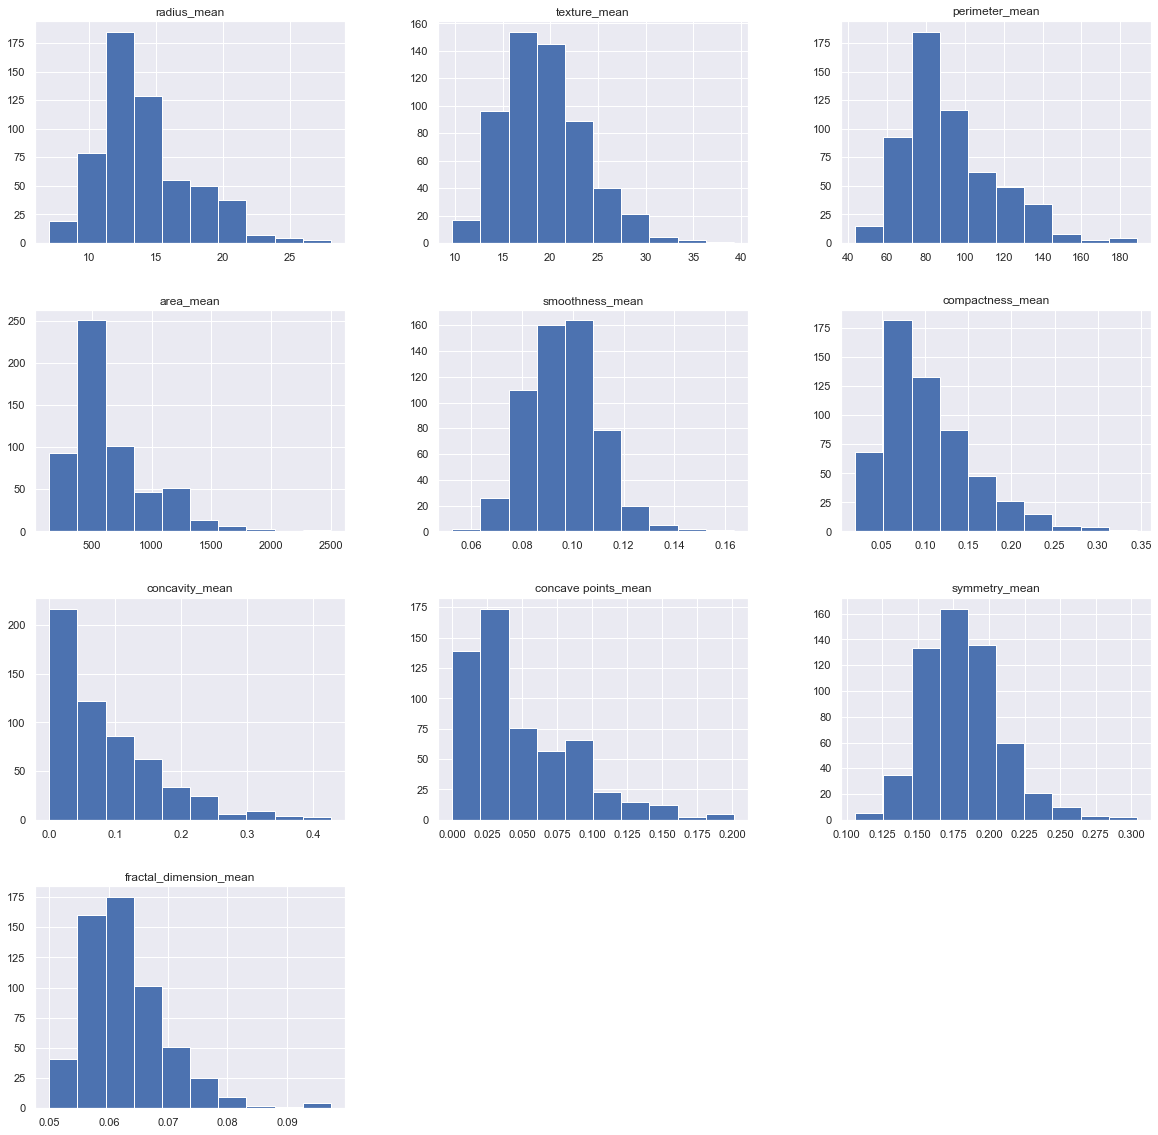

In [10]:
# Draw the histogram of the data's features
data.hist(figsize=(20,20))
plt.show()

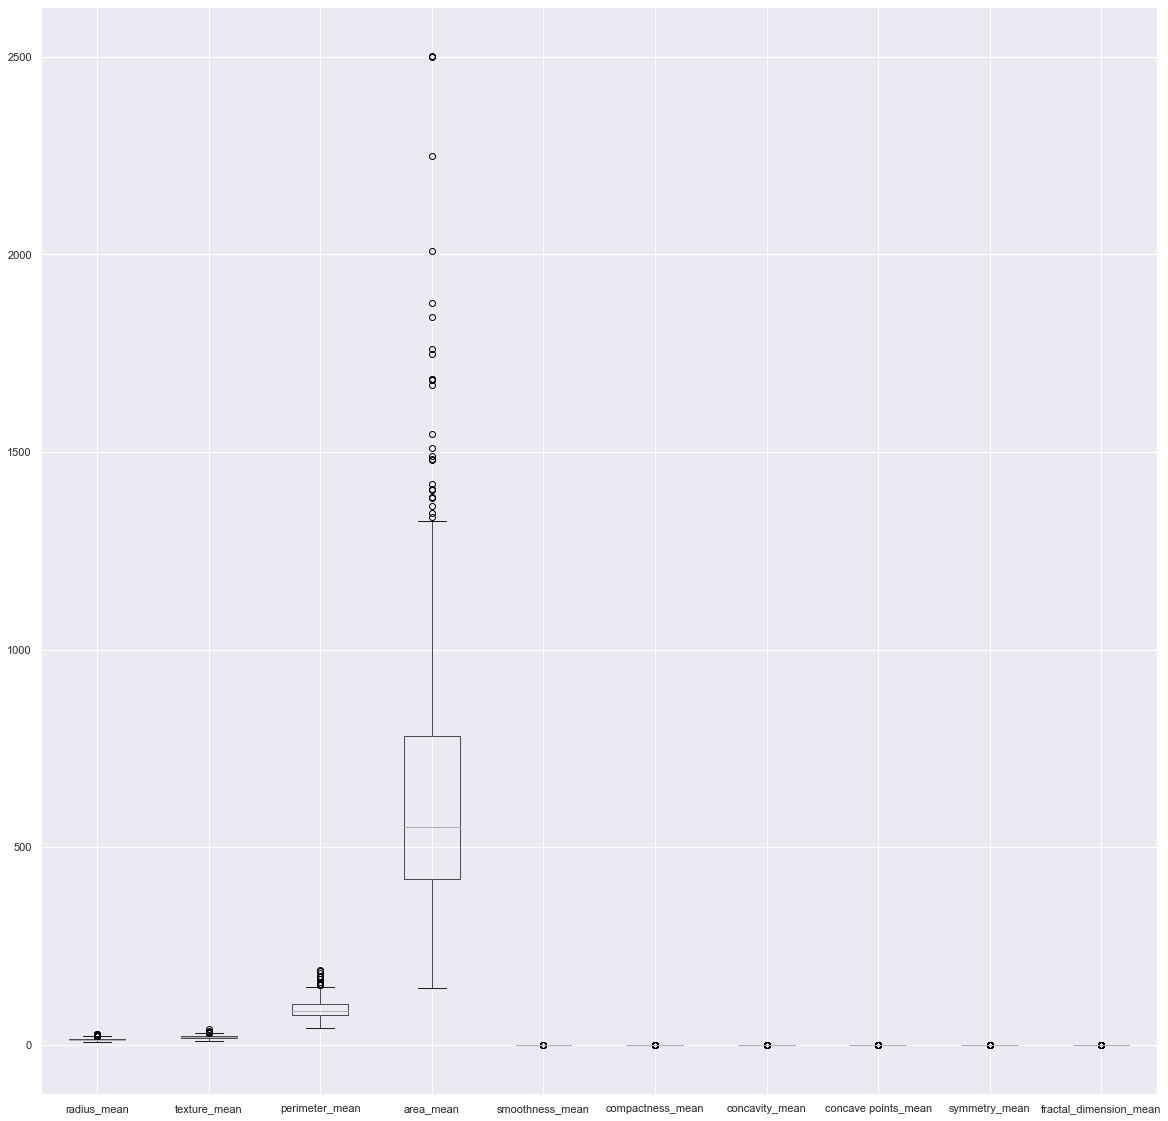

In [11]:
# Draw the boxplots of data features
data.boxplot(figsize=(20,20))
plt.show()

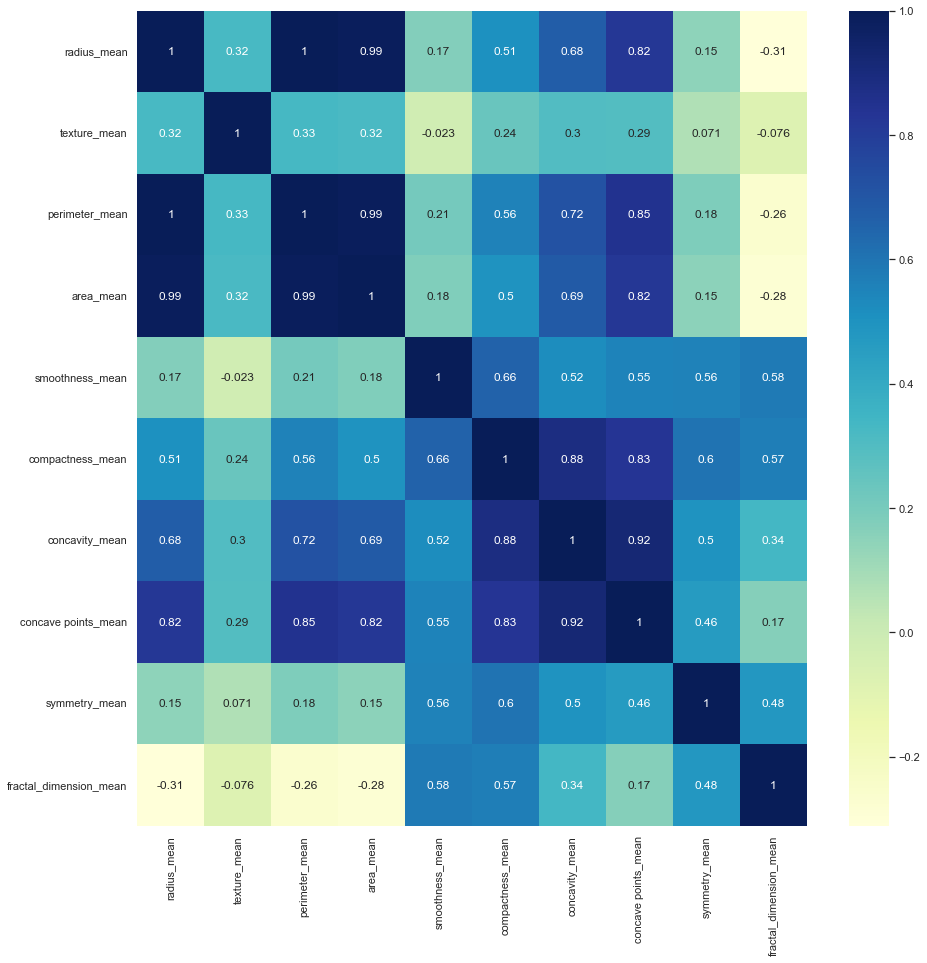

In [12]:
# Drawing the heatmap to check the correlations between variables
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [13]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [14]:
# Create the dataframe with the median of every feature for each label
diagnosis_median = data.groupby('diagnosis').median()
diagnosis_median

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,
B,12.200,17.39,78.18,458.4,0.09076,0.07529,0.03709,0.02344,0.1714,0.061540
M,17.325,21.46,114.20,932.0,0.10220,0.13235,0.15135,0.08628,0.1899,0.061575


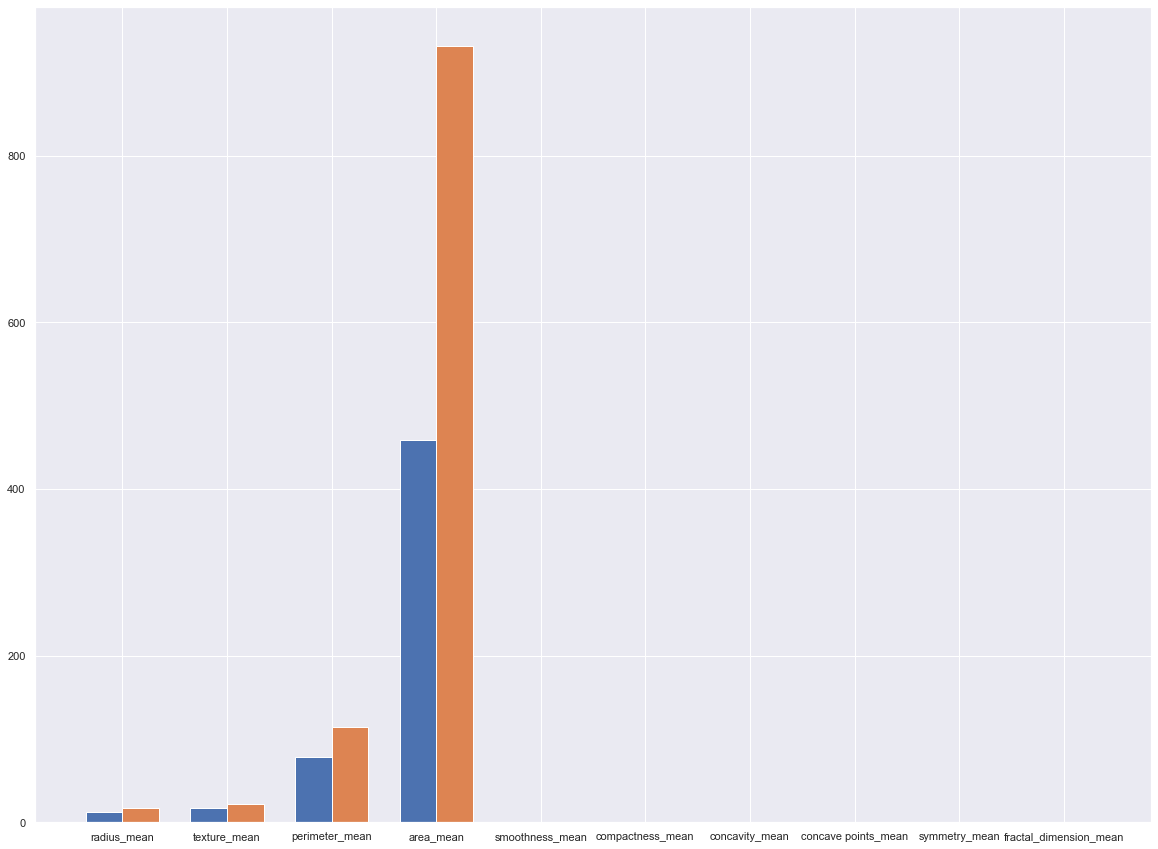

In [15]:
B = diagnosis_median.loc['B'].tolist()
M = diagnosis_median.loc['M'].tolist()

x = np.arange(len(diagnosis_median.columns))
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.bar(x-width/2, B, width, label='B')
rects2 = ax.bar(x+width/2, M, width, label='M')

ax.set_xticks(x)
ax.set_xticklabels(diagnosis_median.columns)
plt.show()

In [16]:
# Extract the numerical features
num_cols = [col for col in data.columns if data[col].dtypes == 'float64']
num_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [17]:
# Remove the outliers for all columns
q = data[num_cols[0]].quantile(0.98)  # Select q range as 98%
p = data[num_cols[0]].quantile(0.02)  # Select q range as 2%
prev_data_clean = data[(data[num_cols[0]] < q) & (data[num_cols[0]] > p)]

for i in range(len(num_cols)-1):
    q = data[num_cols[i]].quantile(0.98)  # Select q range as 98%
    p = data[num_cols[i]].quantile(0.02)  # Select q range as 2%
    data_clean = prev_data_clean[(prev_data_clean[num_cols[i]] < q) & (prev_data_clean[num_cols[i]] > p)]
    prev_data_clean = data_clean

In [18]:
# I did try to apply the model on data_clean but the result is worse than the original dataset so I restore data_clean = data
data_clean = data

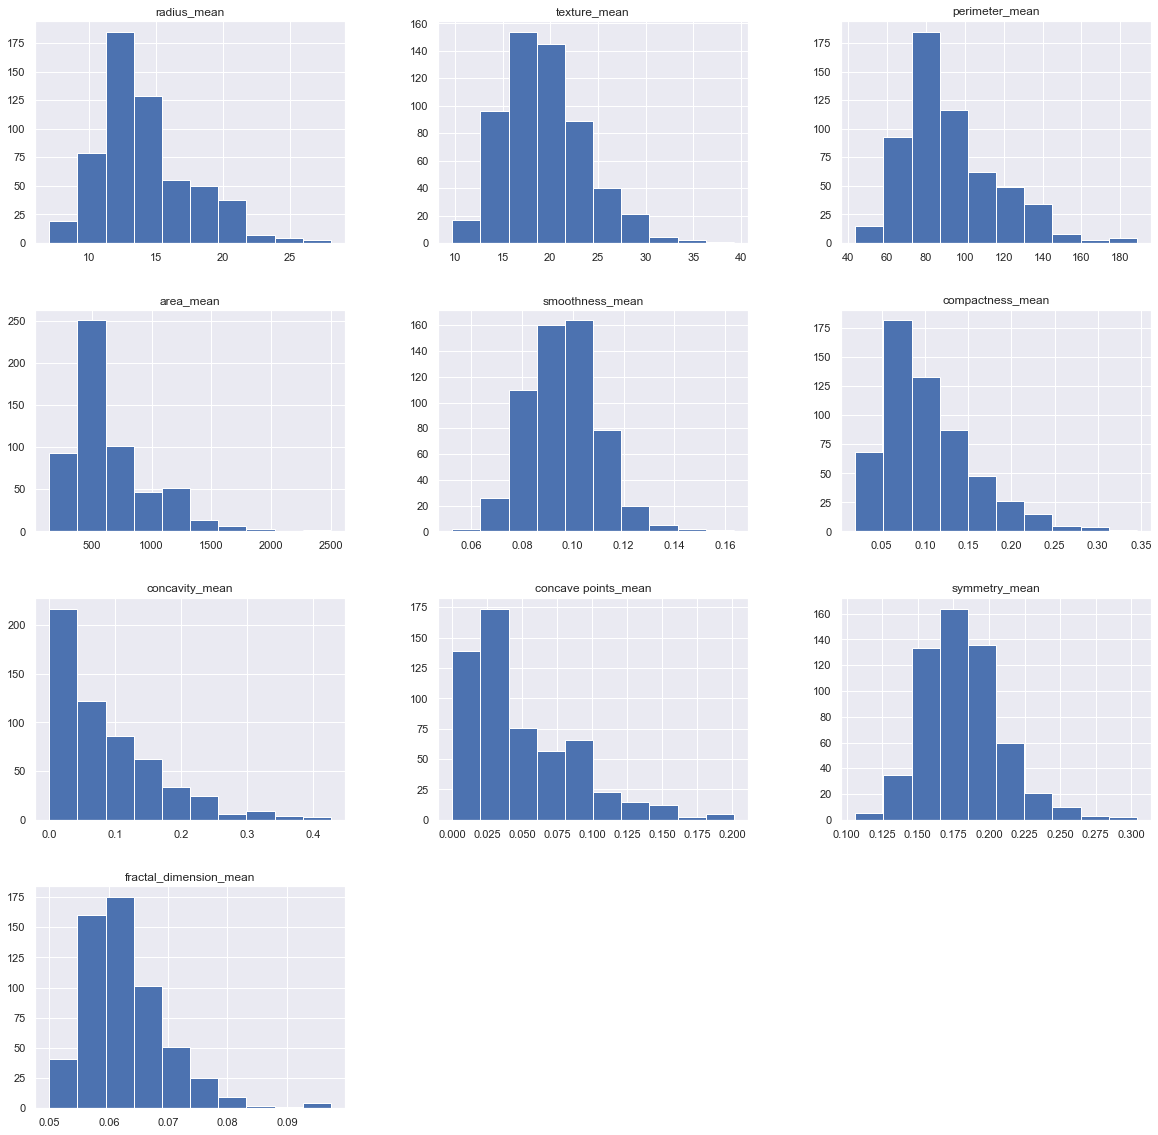

In [19]:
data_clean.hist(figsize = (20,20))
plt.show()

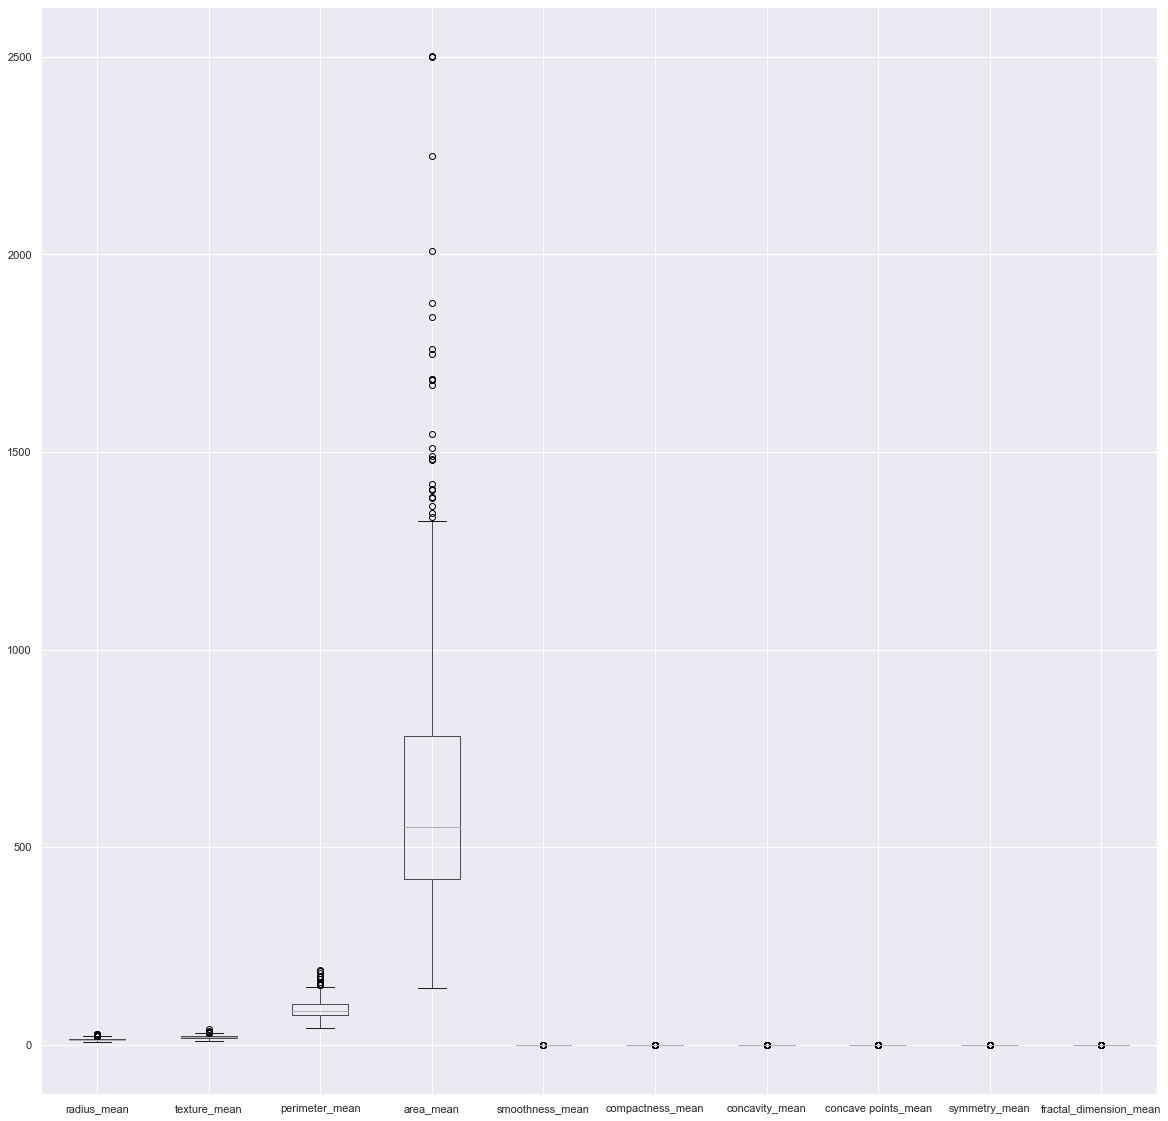

In [20]:
data_clean.boxplot(figsize=(20,20))
plt.show()

In [21]:
# Separating the data features
X = data_clean.drop(columns = ['diagnosis'], axis = 1)

# Assign data labels to variable y
y = data_clean.diagnosis

# Encoding the label y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split train/test with random_state = 10
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.8)

In [22]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284


In [23]:
# Initialize and use StandardScaler to normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized_train = scaler.fit_transform(X_train)
X_normalized_test = scaler.transform(X_test)

In [24]:
# Initialize and fit the SVC model to the training set without tuning hyperparameter
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_normalized_train, y_train)

SVC()

In [25]:
# Import GridSearchCV for finding the best hyper-parameter set.
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
             'gamma': ['scale', 0.001, 0.005, 0.1]}
gridsearch = GridSearchCV(SVC(), param_grid, cv=10, scoring='f1', verbose=1)

In [26]:
# Run the search on training data samples.
svm_gs = gridsearch.fit(X_normalized_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [27]:
# Showing the best hyperparamter set
svm_gs.best_params_

{'C': 1000, 'gamma': 0.005}

In [28]:
# Show the results of each hyperparameter with 10-fold cross validation
result = pd.DataFrame(svm_gs.cv_results_)
result = result.set_index('params')

# Ranking the score of each hyperparameter to choose the best one
result[['mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

,mean_test_score,rank_test_score
params,,
"{'C': 1000, 'gamma': 0.005}",0.937344,1
"{'C': 10, 'gamma': 'scale'}",0.936417,2
"{'C': 10, 'gamma': 0.1}",0.936417,2
"{'C': 100, 'gamma': 0.005}",0.924480,4
"{'C': 1, 'gamma': 0.1}",0.919720,5
"{'C': 1, 'gamma': 'scale'}",0.919720,5
"{'C': 1000, 'gamma': 0.001}",0.915976,7
"{'C': 100, 'gamma': 0.1}",0.915169,8
"{'C': 100, 'gamma': 'scale'}",0.915169,8


In [29]:
# Build the SVC pipeline from the best hyperparamter set
svm_cv = SVC(C=gridsearch.best_params_['C'], gamma = gridsearch.best_params_['gamma'])
svm_cv.fit(X_normalized_train, y_train)

SVC(C=1000, gamma=0.005)

In [30]:
# SVM model's result with tuning hyperparamter
from sklearn.metrics import classification_report

print("SVM model's result with tuning hyperparamter")
print(classification_report(y_test, svm_cv.predict(X_normalized_test)))

# SVM model's result without tuning hyperparamter
print("SVM model's result without tuning hyperparamter")
print(classification_report(y_test, svm.predict(X_normalized_test)))

SVM model's result with tuning hyperparamter
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

SVM model's result without tuning hyperparamter
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### SVM with removing outliers from only 2 most skewed features

In [31]:
# Removing outliers from 2 most skewed features

q = data['fractal_dimension_mean'].quantile(0.98)  # Select q range as 98%
p = data['fractal_dimension_mean'].quantile(0.02)
data_clean_trial = data[(data['fractal_dimension_mean'] < q) 
                  & (data['fractal_dimension_mean'] > p)]

q = data['concavity_mean'].quantile(0.98)  # Select q range as 98%
p = data['concavity_mean'].quantile(0.02)
data_clean_trial = data_clean_trial[(data_clean_trial[num_cols[i]] < q) & (data_clean_trial[num_cols[i]] > p)]
data_clean_trial.shape

(545, 11)

In [32]:
# Separate the data features and data labels
X_trial = data_clean_trial.drop(columns = ['diagnosis'], axis = 1)
y_trial = data_clean_trial.diagnosis

# Encoding the labels
y_trial = le.fit_transform(y_trial)

# Split the data samples to train/test set
X_train_trial, X_test_trial, y_train_trial, y_test_trial= train_test_split(X_trial, y_trial, random_state = 10, train_size = 0.8)

In [33]:
# Normalize the data
X_normalized_train_trial = scaler.fit_transform(X_train_trial)
X_normalized_test_trial = scaler.transform(X_test_trial)

In [34]:
# Initialize and fit the SVC model without tuning hyperparamters
svm.fit(X_normalized_train_trial, y_train_trial)

SVC()

In [35]:
# Run the search on training data samples.
svm_gs = gridsearch.fit(X_normalized_train_trial, y_train_trial)

# Build the SVC pipeline from the best hyperparamter set
svm_cv = SVC(C=gridsearch.best_params_['C'], gamma = gridsearch.best_params_['gamma'])
svm_cv.fit(X_normalized_train_trial, y_train_trial)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


SVC(C=10)

In [36]:
print("SVM model's result without tuning hyperparamter")
print(classification_report(y_test_trial, svm.predict(X_normalized_test_trial)))

SVM model's result without tuning hyperparamter
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.91      0.96        35

    accuracy                           0.97       109
   macro avg       0.98      0.96      0.97       109
weighted avg       0.97      0.97      0.97       109



In [37]:
print("SVM model's result with tuning hyperparamter")
print(classification_report(y_test_trial, svm_cv.predict(X_normalized_test_trial)))

SVM model's result with tuning hyperparamter
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.91      0.96        35

    accuracy                           0.97       109
   macro avg       0.98      0.96      0.97       109
weighted avg       0.97      0.97      0.97       109



## Naive-Bayes

### Without StandardScaler

In [38]:
# Initialize Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()

# Define the values of hyperparameter var_smoothing we want to try
grid_search={"var_smoothing":[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 2e-2, 2e-3, 2e-4, 2e-5, 2e-6, 2e-7, 2e-8, 2e-9, 2e-10, 2e-11, 2e-12, 2e-13, 2e-14, 2e-15]} # Define the values of hyperparameter C we want to try

# Set up GridSearchCV to find the best value of hyperparameter var_smoothing, with 10-fold cross validation
from sklearn.model_selection import GridSearchCV
gridsearch=GridSearchCV(naive_model, grid_search, cv=10)

In [39]:
# Train the model
naive_gs = gridsearch.fit(X_train, y_train) 

In [40]:
# Train the model
naive_gs_trial = gridsearch.fit(X_train_trial, y_train_trial) 

In [41]:
# Show the results of each hyperparameter var_smoothing with 10-fold cross validation
result_normal = pd.DataFrame(naive_gs.cv_results_)
result_normal = result_normal.set_index('params')

# Ranking the score of each hyperparameter var_smoothing to choose the best one
result_normal[['mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

,mean_test_score,rank_test_score
params,,
{'var_smoothing': 1e-15},0.928700,1
{'var_smoothing': 2e-13},0.928700,1
{'var_smoothing': 2e-12},0.928700,1
{'var_smoothing': 2e-11},0.928700,1
{'var_smoothing': 2e-14},0.928700,1
{'var_smoothing': 1e-14},0.928700,1
{'var_smoothing': 1e-13},0.928700,1
{'var_smoothing': 1e-12},0.928700,1
{'var_smoothing': 1e-11},0.928700,1


In [42]:
# Initialize the naive-bayes model and fit
naive = GaussianNB(var_smoothing = naive_gs.best_params_['var_smoothing'])
naive.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-11)

In [43]:
# Initialize the naive-bayes model and fit
naive_trial = GaussianNB(var_smoothing = naive_gs_trial.best_params_['var_smoothing'])
naive_trial.fit(X_train_trial, y_train_trial)

GaussianNB(var_smoothing=1e-11)

In [44]:
print('Classification report with original dataset')
print(classification_report(y_test, naive.predict(X_test)))

print('Classification report with cleaned dataset')
print(classification_report(y_test_trial, naive_trial.predict(X_test_trial)))

Classification report with original dataset
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        75
           1       0.88      0.90      0.89        39

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114

Classification report with cleaned dataset
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        74
           1       0.89      0.91      0.90        35

    accuracy                           0.94       109
   macro avg       0.92      0.93      0.93       109
weighted avg       0.94      0.94      0.94       109



### With StandardScaler 

In [45]:
# Run the search on training set
naive_normal_gs = gridsearch.fit(X_normalized_train, y_train)

# Initialize and train the model
naive_normal = GaussianNB(var_smoothing = naive_normal_gs.best_params_['var_smoothing'])
naive_normal.fit(X_normalized_train, y_train)

GaussianNB(var_smoothing=0.02)

In [46]:
# Run the search on training set
naive_normal_gs_trial = gridsearch.fit(X_normalized_train_trial, y_train_trial)

# Initialize and train the model
naive_normal_trial = GaussianNB(var_smoothing = naive_normal_gs_trial.best_params_['var_smoothing'])
naive_normal_trial.fit(X_normalized_train_trial, y_train_trial)

GaussianNB(var_smoothing=0.01)

In [47]:
print('Classification report with original dataset')
print(classification_report(y_test, naive_normal.predict(X_normalized_test)))

print('Classification report with cleaned dataset')
print(classification_report(y_test_trial, naive_normal_trial.predict(X_normalized_test_trial)))

Classification report with original dataset
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        75
           1       0.88      0.90      0.89        39

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114

Classification report with cleaned dataset
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        74
           1       0.89      0.91      0.90        35

    accuracy                           0.94       109
   macro avg       0.92      0.93      0.93       109
weighted avg       0.94      0.94      0.94       109



## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

tree = DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy'],
        "max_depth": [4, 6, 8, 10],                           # Maximum depth of the tree
         "min_samples_split": [2, 4, 6, 8],
          "min_samples_leaf": [2, 4, 6, 8],
          "max_leaf_nodes": [8, 10, 12]} 

gridsearch = GridSearchCV(tree, params, cv=5)

In [49]:
# Run the search on the training set
tree_gs = gridsearch.fit(X_train, y_train)

In [50]:
# Run the search on the training set
tree_gs_trial = gridsearch.fit(X_train_trial, y_train_trial)

In [51]:
# Ranking the score of each hyperparameter to choose the best one
result = pd.DataFrame(tree_gs.cv_results_)
result = result.set_index('params')
result[['mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

,mean_test_score,rank_test_score
params,,
"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}",0.938062,1
"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}",0.938062,1
"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 4}",0.938036,3
"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 12, 'min_samples_leaf': 2, 'min_samples_split': 4}",0.935789,4
"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 4, 'min_samples_split': 4}",0.935763,5
...,...,...
"{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 12, 'min_samples_leaf': 8, 'min_samples_split': 6}",0.901306,375
"{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 8, 'min_samples_split': 4}",0.901306,375
"{'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 12, 'min_samples_leaf': 8, 'min_samples_split': 8}",0.901306,375


In [52]:
# Initialize the model
tree_model = DecisionTreeClassifier(criterion = tree_gs.best_params_['criterion'],
                                    max_depth = tree_gs.best_params_['max_depth'],
                                    max_leaf_nodes = tree_gs.best_params_['max_leaf_nodes'],
                                    min_samples_split = tree_gs.best_params_['min_samples_split'],
                                    min_samples_leaf = tree_gs.best_params_['min_samples_leaf'])

In [53]:
# Initialize the model
tree_model_trial = DecisionTreeClassifier(criterion = tree_gs_trial.best_params_['criterion'],
                                    max_depth = tree_gs_trial.best_params_['max_depth'],
                                    max_leaf_nodes = tree_gs_trial.best_params_['max_leaf_nodes'],
                                    min_samples_split = tree_gs_trial.best_params_['min_samples_split'],
                                    min_samples_leaf = tree_gs_trial.best_params_['min_samples_leaf'])

In [54]:
# Train the model
tree_model.fit(X_train, y_train)
tree_model_trial.fit(X_train_trial, y_train_trial)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_leaf=2)

In [55]:
print('Classification report with original dataset')
print(classification_report(y_test, tree_model.predict(X_test)))

print('Classification report with cleaned dataset')
print(classification_report(y_test_trial, tree_model_trial.predict(X_test_trial)))

Classification report with original dataset
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        75
           1       0.94      0.79      0.86        39

    accuracy                           0.91       114
   macro avg       0.92      0.88      0.90       114
weighted avg       0.91      0.91      0.91       114

Classification report with cleaned dataset
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        74
           1       0.89      0.91      0.90        35

    accuracy                           0.94       109
   macro avg       0.92      0.93      0.93       109
weighted avg       0.94      0.94      0.94       109



## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [7, 9, 11],                           # Maximum depth of the tree
         "min_samples_split": [8, 12, 16]}    

# Initialize the GridSeachCV
gridsearch = GridSearchCV(RandomForestClassifier(n_estimators=10, n_jobs = 10),params,cv=10)

In [57]:
# Run the search on the training set
forest_gs = gridsearch.fit(X_train, y_train)
forest_gs_trial = gridsearch.fit(X_train_trial, y_train_trial)

result = pd.DataFrame(forest_gs.cv_results_)
result = result.set_index('params')

result[['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,mean_test_score,rank_test_score
params,,
"{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 16}",0.944820,1
"{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 12}",0.940328,2
"{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 16}",0.940275,3
"{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 12}",0.937949,4
"{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 8}",0.937844,5
"{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 8}",0.937791,6
"{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 12}",0.935677,7
"{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 8}",0.935518,8
"{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 8}",0.933457,9


In [58]:
# Build the pipeline from the best hyperparamter set
forest_model = RandomForestClassifier(n_estimators=10,
                                      random_state=1,
                                      criterion = forest_gs.best_params_['criterion'],
                                      max_depth = forest_gs.best_params_['max_depth'],
                                      min_samples_split = forest_gs.best_params_['min_samples_split'])

In [59]:
# Build the pipeline from the best hyperparamter set
forest_model_trial = RandomForestClassifier(n_estimators=10,
                                      random_state=1,
                                      criterion = forest_gs_trial.best_params_['criterion'],
                                      max_depth = forest_gs_trial.best_params_['max_depth'],
                                      min_samples_split = forest_gs_trial.best_params_['min_samples_split'])

In [60]:
forest_model.fit(X_train, y_train)
print('Classification report with original dataset')
print(classification_report(y_test, forest_model.predict(X_test)))

forest_model_trial.fit(X_train_trial, y_train_trial)
print('Classification report with cleaned dataset')
print(classification_report(y_test_trial, forest_model_trial.predict(X_test_trial)))

Classification report with original dataset
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        75
           1       0.90      0.90      0.90        39

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Classification report with cleaned dataset
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        74
           1       0.88      1.00      0.93        35

    accuracy                           0.95       109
   macro avg       0.94      0.97      0.95       109
weighted avg       0.96      0.95      0.95       109



## Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()                      # Initialize Logistic Regression model

params = {'C': [0.001, 0.01, 0.01, 1, 10, 100]}
gridsearch = GridSearchCV(logmodel, params, cv = 10)

# # Run the search on the training set
log_gs = gridsearch.fit(X_normalized_train, y_train)
log_gs_trial = gridsearch.fit(X_normalized_train_trial, y_train_trial)

In [62]:
# Ranking the score of each hyperparameter to choose the best one

result = pd.DataFrame(log_gs.cv_results_)
result = result.set_index('params')
result[['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,mean_test_score,rank_test_score
params,,
{'C': 1},0.935782,1
{'C': 10},0.933510,2
{'C': 100},0.933510,2
{'C': 0.01},0.917178,4
{'C': 0.01},0.917178,4
{'C': 0.001},0.811786,6


In [63]:
# Train the model
log_model = LogisticRegression(C = log_gs.best_params_['C'])
log_model.fit(X_normalized_train, y_train)

LogisticRegression(C=1)

In [64]:
# Train the model
log_model_trial = LogisticRegression(C = log_gs_trial.best_params_['C'])
log_model_trial.fit(X_normalized_train_trial, y_train_trial)

LogisticRegression(C=1)

In [65]:
print('Classification report with original dataset')
print(classification_report(y_test, log_model.predict(X_normalized_test)))

print('Classification report with cleaned dataset')
print(classification_report(y_test, log_model_trial.predict(X_normalized_test)))

Classification report with original dataset
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        75
           1       0.92      0.92      0.92        39

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Classification report with cleaned dataset
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In general, Support Vector Machine model perform best among other traditional machine learning models.